# Task 35-> Convolutional Neural Networks (CNNs) 

Convolutional Neural Networks (CNNs) are a class of deep learning models designed specifically to process structured grid data, such as images. CNNs have revolutionized the field of computer vision by enabling machines to understand and interpret visual information with unprecedented accuracy. 

## 1. Understanding Convolutional Neural Networks
### What are CNNs?
Convolutional Neural Networks are specialized types of neural networks optimized for image and video recognition tasks. Unlike traditional neural networks that treat each input feature as independent, CNNs leverage the spatial structure of the data to identify patterns like edges, textures, and shapes. This is achieved through convolutional layers that automatically and adaptively learn spatial hierarchies of features from input images.

### How Do CNNs Work?
CNNs work by passing the input data through a series of layers, each designed to perform specific operations. These layers include convolutional layers, pooling layers, and fully-connected layers. The convolutional layers apply filters to the input image to extract feature maps, the pooling layers reduce the spatial dimensions of these maps, and the fully-connected layers use the extracted features to perform classification or other tasks.

## Importing nnecessary files

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization, Input, UpSampling2D, Concatenate
from keras.optimizers import RMSprop, Adam
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings

## Ignore warnings of input data

In [8]:
warnings.filterwarnings('ignore')

# Laading Data
## 1. Load the training dataset


In [9]:
train = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_train.csv")
print(train.shape)

(60000, 785)


In [10]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
train.iloc[0].value_counts()

0
0      306
213     21
210     20
207     20
208     17
      ... 
148      1
227      1
107      1
52       1
161      1
Name: count, Length: 126, dtype: int64

## 2. Reading test dataset


In [12]:
test = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_test.csv")
print(test.shape)

(10000, 785)


In [13]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Put labels into Y_train variable


In [14]:
Y_train = train["label"].values
# Drop 'label' column
X_train = train.drop(labels = ["label"], axis = 1)
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Put labels into Y_test variable


In [15]:
Y_test = test["label"].values
# Drop 'label' column
X_test = test.drop(labels = ["label"], axis = 1)
X_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


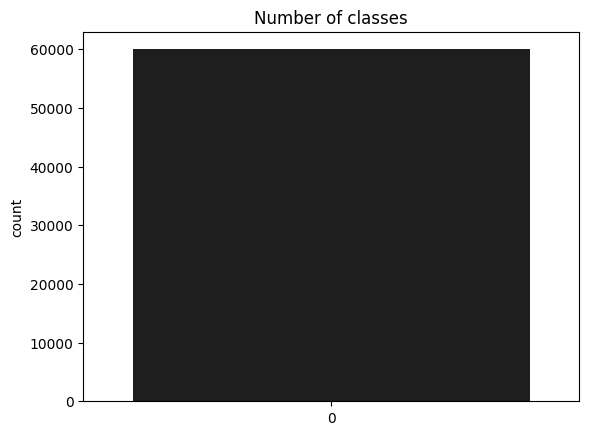

In [20]:
sns.countplot(Y_train, palette="icefire")
plt.title("Number of classes")
plt.show()

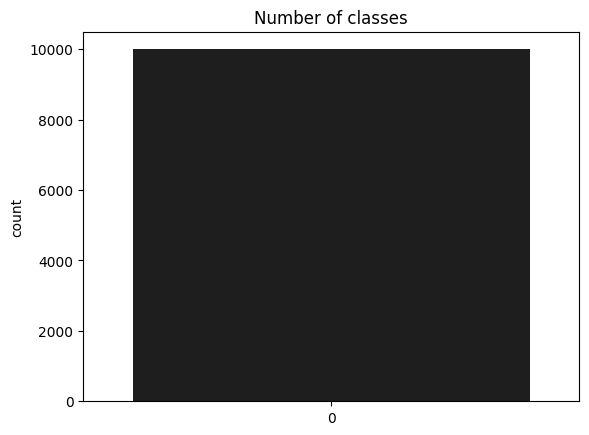

In [21]:
sns.countplot(Y_test, palette="icefire")
plt.title("Number of classes")
plt.show()

## Plot some samples


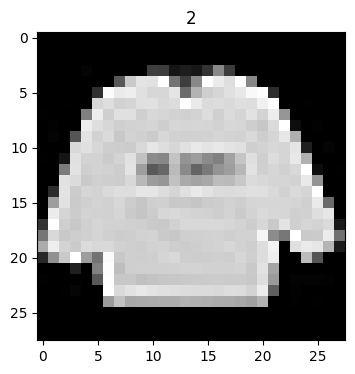

In [22]:
plt.figure(figsize=(4,4))
plt.title(Y_train[0])
plt.imshow(X_train.values.reshape(-1,28,28)[0],cmap="gray")

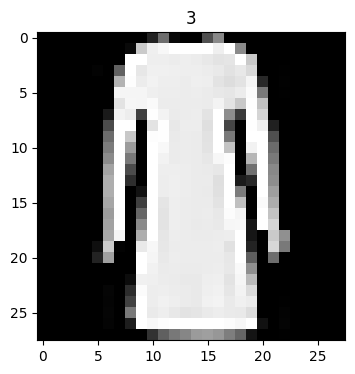

In [23]:
plt.figure(figsize=(4,4))
plt.title(Y_train[17])
plt.imshow(X_train.values.reshape(-1,28,28)[17],cmap="gray")

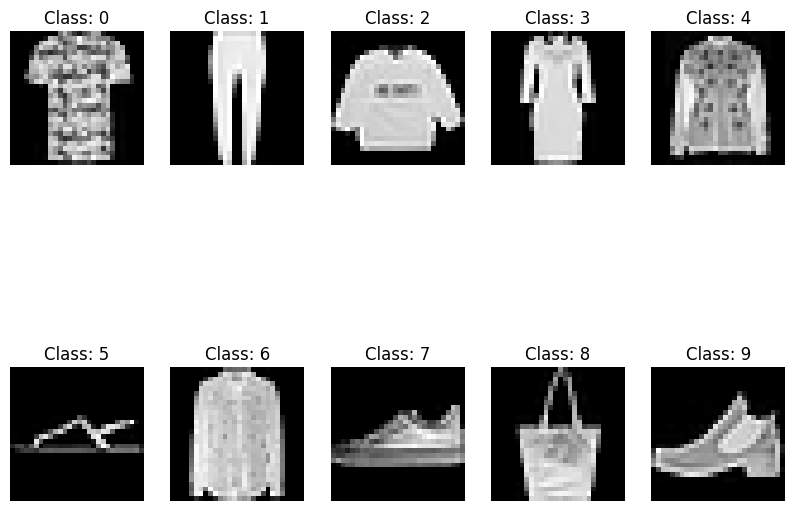

In [24]:
plt.figure(figsize = (10,8))

for i in range(10):
    plt.subplot(2, 5, i+1)
    img = train[train.label == i].iloc[0, 1:].values
    img = img.reshape((28,28))
    plt.imshow(img, cmap='gray')
    plt.title("Class: " + str(i))
    plt.axis('off')
    
plt.show()

## Normalize the data


In [25]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [26]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.0,0.0,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [27]:
X_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.035294,0.031373,0.000000,...,0.403922,0.341176,0.219608,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.133333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.054902,0.207843,0.388235,0.066667,...,0.000000,0.000000,0.000000,0.0,0.247059,0.207843,0.121569,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.631373,...,0.537255,0.494118,0.549020,0.0,0.521569,0.878431,0.870588,0.219608,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0


## Reshape the data


In [28]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train shape:  (60000, 28, 28, 1)
X_test shape:  (10000, 28, 28, 1)


## Convert labels to one-hot encoding


In [29]:
Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)
print(Y_train.shape)
print(Y_test.shape)

(60000, 10)
(10000, 10)


## Split the data into training and validation sets


We split the data into train and test sets.<br>
test size is 10%.<br>
train size is 90%.

In [30]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=2)
print("x_train shape: ",x_train.shape)
print("x_val shape: ",x_val.shape)
print("y_train shape: ",y_train.shape)
print("y_val shape :",y_val.shape)

x_train shape:  (54000, 28, 28, 1)
x_val shape:  (6000, 28, 28, 1)
y_train shape:  (54000, 10)
y_val shape : (6000, 10)


## Some examples


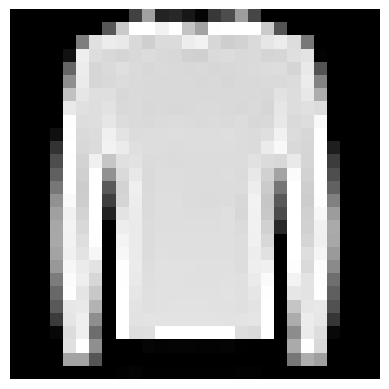

In [31]:
plt.imshow(x_train[4].reshape(28,28),cmap="gray")
plt.axis("off")
plt.show()

## Plot the distribution of classes


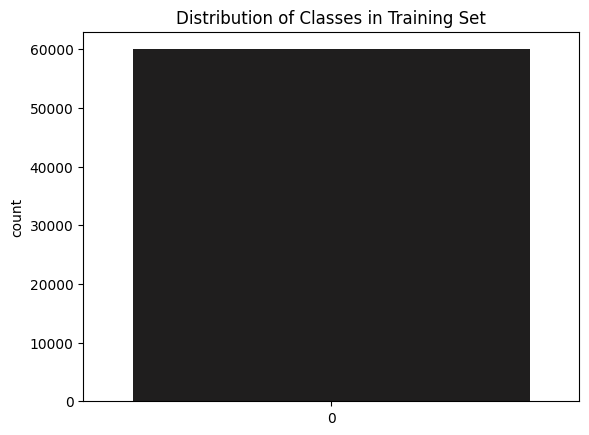

In [33]:
sns.countplot(np.argmax(Y_train, axis=1), palette="icefire")
plt.title("Distribution of Classes in Training Set")
plt.show()

## Display a few sample images


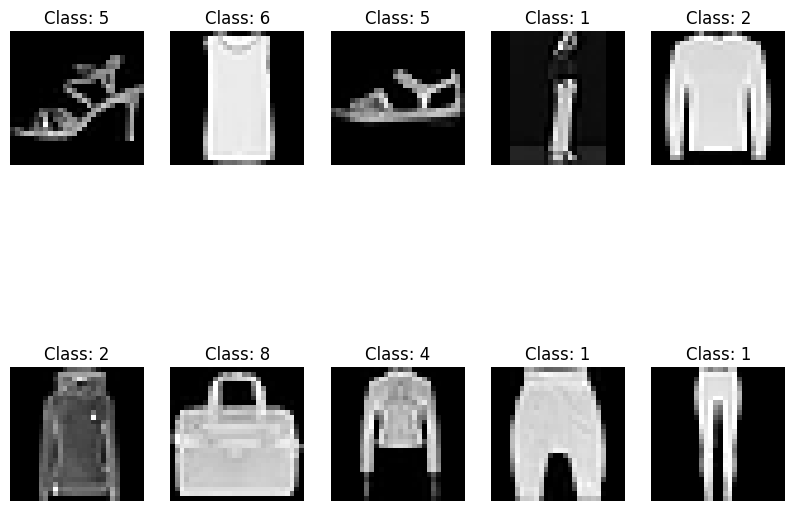

In [34]:
plt.figure(figsize=(10,8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    img = x_train[i].reshape(28,28)
    plt.imshow(img, cmap='gray')
    plt.title("Class: " + str(np.argmax(y_train[i])))
    plt.axis('off')
plt.show()

# CNN Architecture
## 1. Convolutional Layer
The convolutional layer is the cornerstone of CNNs. It applies a set of filters (or kernels) to the input image, performing convolution operations to produce feature maps. These filters slide over the image, detecting local patterns such as edges or textures. The key components of a convolutional layer are:

### Input Data: 
Typically a 3D array (height, width, depth) representing the image. For color images, the depth corresponds to the RGB channels.
### Filters (Kernels): 
Small 2D arrays of weights that are learned during training. These filters detect specific features in the image.
### Stride: 
The step size by which the filter moves across the image. A larger stride results in a smaller output size.
### Padding: 
Techniques used to control the spatial size of the output. Padding can be:
### Valid Padding (No Padding): 
No extra pixels are added; the filter might not cover the entire image, reducing output size.
### Same Padding: 
Pads the input so the output has the same size as the input.
### Full Padding: 
Pads the input so the output size is larger than the input size.<br>
After the convolution operation, a non-linear activation function, typically ReLU (Rectified Linear Unit), is applied to introduce non-linearity into the model.

## 2. Pooling Layer
The pooling layer performs downsampling by reducing the spatial dimensions of the feature maps while retaining important features. There are two main types of pooling:

### Max Pooling: 
Selects the maximum value from the portion of the feature map covered by the filter. This operation reduces the dimensionality while preserving the most significant features.
### Average Pooling: 
Computes the average value of the elements within the filter region. Although less commonly used, it can be beneficial in certain contexts.<br>
Pooling layers help reduce computational complexity, prevent overfitting, and make the network more robust to variations in the input.

## 3. Fully-Connected Layer (FC Layer)
The fully-connected layer is where the final classification or regression task is performed. In this layer, each node is connected to every node in the previous layer. The extracted features from the convolutional and pooling layers are flattened into a one-dimensional vector and passed through the fully-connected layers. A softmax activation function is often used in the output layer to produce probabilities for classification tasks.

In [43]:
model = Sequential()

In [44]:
# Layer 1
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='Same', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Activation("relu"))

In [45]:
# Layer 2
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='Same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

In [46]:
# Layer 3
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same'))
model.add(BatchNormalization())
model.add(Activation("relu"))

In [47]:
# Layer 4
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

In [48]:
# Fully Connected Layer
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.25))

In [49]:
# Output Layer
model.add(Dense(10, activation='softmax'))

In [50]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       803,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 872,426 (3.33 MB)

 Trainable params: 871,530 (3.32 MB)

 Non-trainable params: 896 (3.50 KB)

## Define Optimizer
### Adam optimizer: Change the learning rate

In [51]:
optimizer = Adam(learning_rate=0.001)

<a id="7"></a>
## Compile Model
* **Categorical crossentropy**
* **We make binary cross entropy at previous parts and in machine learning tutorial**
* **At this time we use categorical crossentropy. That means that we have multiclass**
 <a href="https://ibb.co/jm1bpp"><img src="https://preview.ibb.co/nN3ZaU/cce.jpg" alt="cce" border="0"></a>

In [52]:
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Data Augmentation:
Data augmentation is a technique in deep learning used to artificially increase the size and diversity of a training dataset. By applying various transformations—such as flipping, rotating, and scaling images—data augmentation helps improve the robustness and generalization of models. This approach is especially valuable in image processing tasks, where it can enhance model performance by exposing it to a wider variety of inputs, reducing the risk of overfitting, and improving the model's ability to handle real-world variations.

In [53]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.1,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

## Epochs and Batch Size

In [54]:
epochs = 50 # for better result increase the epochs
batch_size = 100

## Fit the model


In [55]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                    epochs=epochs, 
                    validation_data=(x_val, y_val), 
                    verbose=2)

Epoch 1/50
540/540 - 140s - 260ms/step - accuracy: 0.8175 - loss: 0.4920 - val_accuracy: 0.8835 - val_loss: 0.3225
Epoch 2/50
540/540 - 138s - 256ms/step - accuracy: 0.8716 - loss: 0.3475 - val_accuracy: 0.8900 - val_loss: 0.2949
Epoch 3/50
540/540 - 149s - 276ms/step - accuracy: 0.8842 - loss: 0.3120 - val_accuracy: 0.8773 - val_loss: 0.3182
Epoch 4/50
540/540 - 193s - 357ms/step - accuracy: 0.8941 - loss: 0.2869 - val_accuracy: 0.9175 - val_loss: 0.2232
Epoch 5/50
540/540 - 138s - 255ms/step - accuracy: 0.9011 - loss: 0.2678 - val_accuracy: 0.9025 - val_loss: 0.2558
Epoch 6/50
540/540 - 137s - 253ms/step - accuracy: 0.9056 - loss: 0.2563 - val_accuracy: 0.9160 - val_loss: 0.2253
Epoch 7/50
540/540 - 136s - 252ms/step - accuracy: 0.9104 - loss: 0.2441 - val_accuracy: 0.9042 - val_loss: 0.2608
Epoch 8/50
540/540 - 137s - 254ms/step - accuracy: 0.9137 - loss: 0.2362 - val_accuracy: 0.9188 - val_loss: 0.2123
Epoch 9/50
540/540 - 136s - 251ms/step - accuracy: 0.9156 - loss: 0.2289 - val_a

## Plot the training history


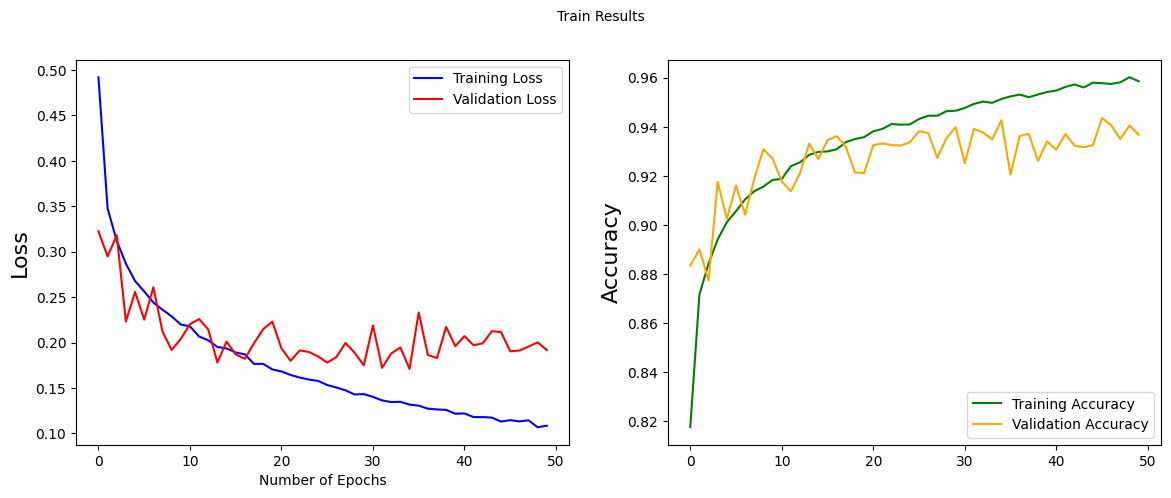

In [60]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.suptitle('Train Results', fontsize=10)
plt.xlabel("Number of Epochs")
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], color='green', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Print the final accuracy


In [61]:
print('Train accuracy of the model: ',history.history['accuracy'][-1])
print('Train loss of the model: ',history.history['loss'][-1])

Train accuracy of the model:  0.9585370421409607
Train loss of the model:  0.10852145403623581


In [62]:
print('Validation accuracy of the model: ',history.history['val_accuracy'][-1])
print('Validation loss of the model: ',history.history['val_loss'][-1])

Validation accuracy of the model:  0.9368333220481873
Validation loss of the model:  0.19176405668258667


In [63]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

Test Loss: 0.1846247911453247
Test Accuracy: 0.9391000270843506


## Confusion Matrix



313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step


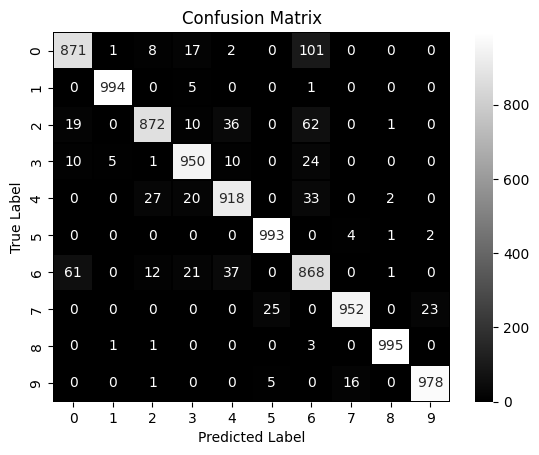

In [69]:
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_test, axis=1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap="gist_yarg_r", linecolor="black", fmt='.0f')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [70]:
for i in range(len(confusion_mtx)):
    print("Class:",str(i))
    print("Number of Wrong Prediction:", str(sum(confusion_mtx[i])-confusion_mtx[i][i]), "out of 1000")
    print("Percentage of True Prediction: {:.2f}%".format(confusion_mtx[i][i] / 10))
    print("***********************************************************")

Class: 0
Number of Wrong Prediction: 129 out of 1000
Percentage of True Prediction: 87.10%
***********************************************************
Class: 1
Number of Wrong Prediction: 6 out of 1000
Percentage of True Prediction: 99.40%
***********************************************************
Class: 2
Number of Wrong Prediction: 128 out of 1000
Percentage of True Prediction: 87.20%
***********************************************************
Class: 3
Number of Wrong Prediction: 50 out of 1000
Percentage of True Prediction: 95.00%
***********************************************************
Class: 4
Number of Wrong Prediction: 82 out of 1000
Percentage of True Prediction: 91.80%
***********************************************************
Class: 5
Number of Wrong Prediction: 7 out of 1000
Percentage of True Prediction: 99.30%
***********************************************************
Class: 6
Number of Wrong Prediction: 132 out of 1000
Percentage of True Prediction: 86.80%
*********

## Display a correct and incorrect prediction


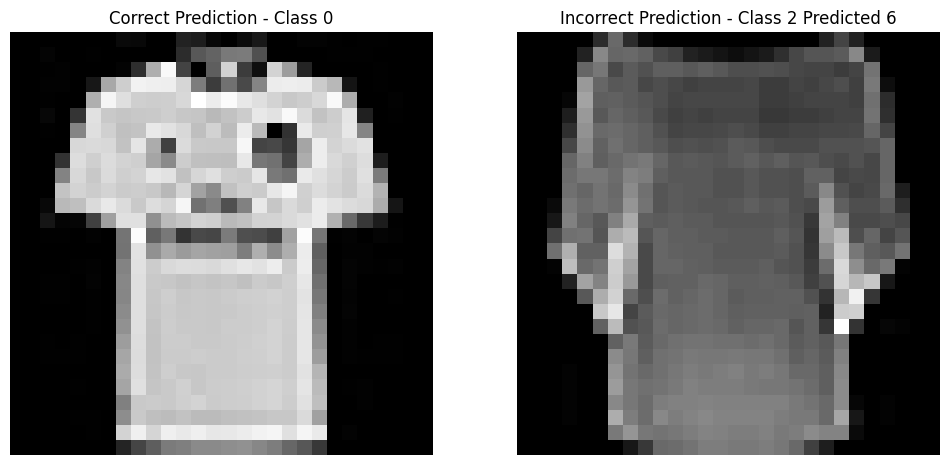

In [71]:
correct = np.where(Y_pred_classes == Y_true)[0][0]
incorrect = np.where(Y_pred_classes != Y_true)[0][0]

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title(f'Correct Prediction - Class {Y_true[correct]}')
plt.imshow(X_test[correct].reshape(28,28), cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'Incorrect Prediction - Class {Y_true[incorrect]} Predicted {Y_pred_classes[incorrect]}')
plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray')
plt.axis('off')
plt.show()

# Image Denoising
CNNs can be used to remove noise from images, enhancing their quality. Image denoising is crucial in fields like photography, where low-light conditions introduce noise into images, and in medical imaging, where noise can obscure important details.

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 61s 139ms/step - loss: 0.3788 - val_loss: 0.3035
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 58s 138ms/step - loss: 0.3035 - val_loss: 0.2977
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 141ms/step - loss: 0.2990 - val_loss: 0.2953
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 142ms/step - loss: 0.2968 - val_loss: 0.2937
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 60s 142ms/step - loss: 0.2948 - val_loss: 0.2924
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 59s 141ms/step - loss: 0.2932 - val_loss: 0.2909
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 59s 140ms/step - loss: 0.2927 - val_loss: 0.2905
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 59s 139ms/step - loss: 0.2917 - val_loss: 0.2894
Epoch 9/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 58s 138ms/step - loss: 0.2910 - val_loss: 0.2888
Epoch 10/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 59s 140ms/step - loss: 0.2905 - val_loss: 0.2881
Epoch 11/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 59s 140ms/step - loss: 0.2906 - val_loss: 0.2881
Epoch 12/20
422/422

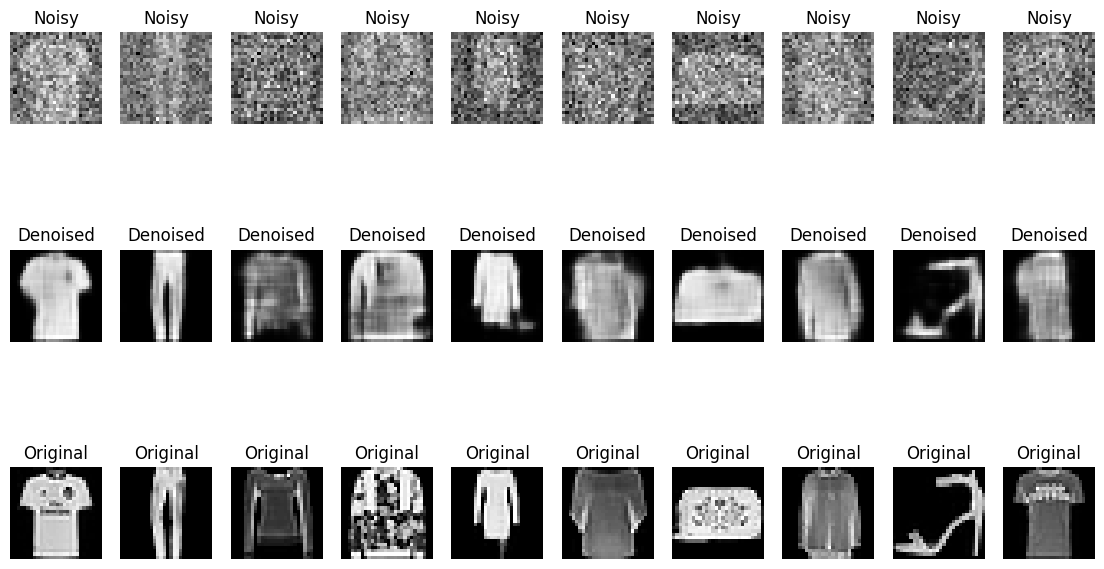

In [4]:
# Denoising Autoencoder
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPool2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPool2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_val_noisy = x_val + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_val.shape)

autoencoder.fit(x_train_noisy, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_val_noisy, x_val))

# Denoise the test images
x_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
denoised_images = autoencoder.predict(x_test_noisy)

# Plot the noisy and denoised images
plt.figure(figsize=(14,8))
for i in range(10):
    plt.subplot(3, 10, i+1)
    plt.imshow(x_test_noisy[i].reshape(28,28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')
    
    plt.subplot(3, 10, i+11)
    plt.imshow(denoised_images[i].reshape(28,28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')
    
    plt.subplot(3, 10, i+21)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title("Original")
    plt.axis('off')
plt.show()

# Image Segmentation
Image segmentation involves partitioning an image into regions of interest, such as separating the foreground from the background. CNNs are used in medical imaging to segment organs or tumors from scans, as well as in applications like self-driving cars for lane detection.

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1360s 3s/step - accuracy: 0.5018 - loss: 0.3235 - val_accuracy: 0.5126 - val_loss: 0.2433
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1366s 3s/step - accuracy: 0.5094 - loss: 0.2433 - val_accuracy: 0.5126 - val_loss: 0.2405
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1365s 3s/step - accuracy: 0.5098 - loss: 0.2422 - val_accuracy: 0.5126 - val_loss: 0.2400
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1387s 3s/step - accuracy: 0.5098 - loss: 0.2413 - val_accuracy: 0.5126 - val_loss: 0.2397
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1374s 3s/step - accuracy: 0.5095 - loss: 0.2410 - val_accuracy: 0.5126 - val_loss: 0.2396
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1349s 3s/step - accuracy: 0.5094 - loss: 0.2412 - val_accuracy: 0.5126 - val_loss: 0.2397
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1351s 3s/step - accuracy: 0.5094 - loss: 0.2414 - val_accuracy: 0.5126 - val_loss: 0.2394
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1410s 3s/step - accuracy: 0.5086 - loss: 0.2415 - 

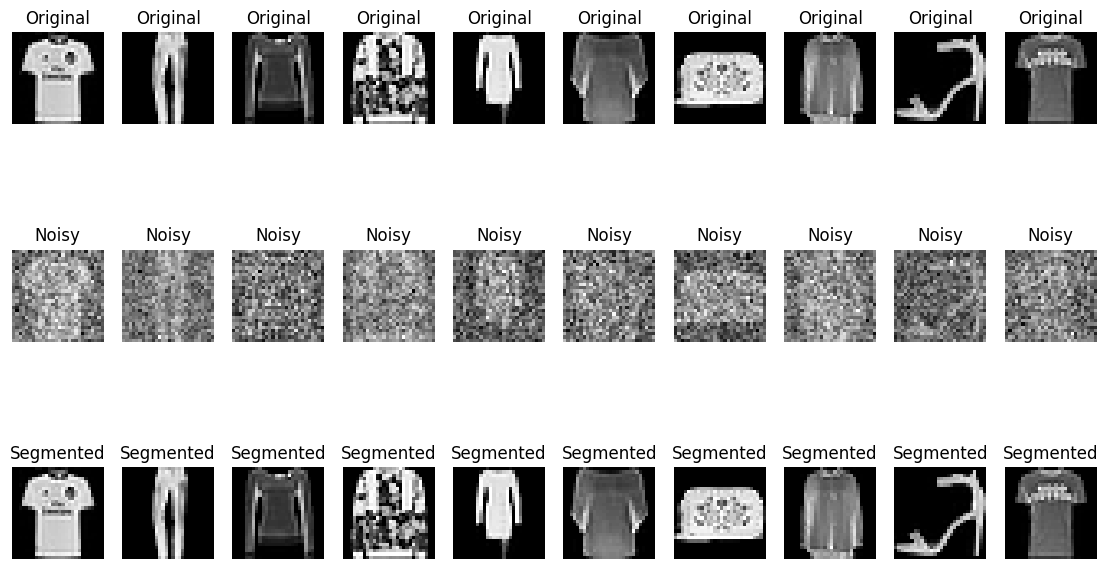

In [6]:
# U-Net Model for Image Segmentation
def unet_model(input_size=(28, 28, 1)):
    inputs = Input(input_size)

    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPool2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPool2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)

    up4 = Concatenate()([UpSampling2D(size=(2, 2))(conv3), conv2])
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(up4)
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv4)

    up5 = Concatenate()([UpSampling2D(size=(2, 2))(conv4), conv1])
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up5)
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv5)

    conv6 = Conv2D(1, (1, 1), activation='sigmoid')(conv5)

    model = Model(inputs=[inputs], outputs=[conv6])
    return model

# Prepare U-Net Model
unet = unet_model()
# Compile the U-Net model
unet.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


# Train U-Net Model
unet.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_val, x_val))

# Apply the U-Net model to segment images
segmented_images = unet.predict(X_test)

# Plot the original, noisy, and segmented images
plt.figure(figsize=(14,8))
for i in range(10):
    plt.subplot(3, 10, i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title("Original")
    plt.axis('off')
    
    plt.subplot(3, 10, i+11)
    plt.imshow(x_test_noisy[i].reshape(28,28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')
    
    plt.subplot(3, 10, i+21)
    plt.imshow(segmented_images[i].reshape(28,28), cmap='gray')
    plt.title("Segmented")
    plt.axis('off')
plt.show()